#### Data Science - Coursework 2 (50%)
# What caused this gravitational wave signal?
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Science-2024/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a PDF file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- It is estimated that the workload required for this CA is approximately 30-35 hours.

<div class="alert-info">
Please also take note of the University’s policy on plagiarism, which is outlined in your student handbook.
 </div>

Plagiarism is the act of passing off the words or ideas of others as if your own. Advice on avoiding plagiarism is given in the UG Student Handbook. There is also considerable help and advice on Learning Central and the University web site. Students need to be especially careful of plagiarism in computing tasks and you are advised not to share code through electronic means. Students working together during their weekly exercises and the coursework is great (and indeed encouraged) but need to ensure that they are not using each other's code or text.

This coursework will be submitted via Learning Central's Turnitin which automatically checks for plagiarism.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You will find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part A - Some background [15 marks]

**Answer:**

How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging?

Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.

The file gravitationalwaveevents.csv contains the properties of previously observed gravitational waves.
Plot the total mass (given in solar masses, 1M⊙ = 1.99×10^30 kg) of the merging sources against their distance (given in units of Mpc, 1 pc = 3 × 10^16m).

In [2]:
GravWavDat=pd.read_csv('/content/gravitationalwaveevents.csv')
print(GravWavDat.head())

       DL  DL_err  Mtot  Mtot_err  Mchirp  Mchirp_err detType
0   430.0   170.0  63.1       3.0    28.6        -1.5      GW
1  1060.0   480.0  35.7       3.8    15.2        -1.1      GW
2   440.0   190.0  20.5       1.5     8.9        -0.3      GW
3   960.0   410.0  49.1       3.9    21.5        -1.7      GW
4   320.0   110.0  17.8       0.7     7.9        -0.2      GW


Text(0.5, 1.0, 'Gravitational Wave Data: Luminosity Distance vs Total Mass')

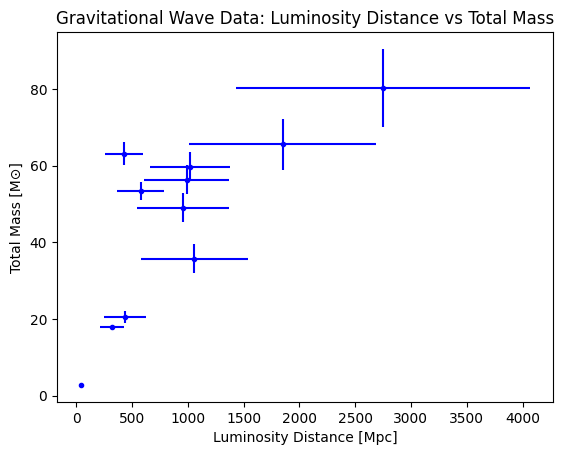

In [3]:
plt.errorbar(GravWavDat['DL'],GravWavDat['Mtot'],GravWavDat['Mtot_err'],GravWavDat['DL_err'],'b.')
plt.xlabel('Luminosity Distance [Mpc]')
plt.ylabel('Total Mass [M⊙]')
plt.title('Gravitational Wave Data: Luminosity Distance vs Total Mass')

***

## Part B - The data [15 marks]

**Answer:**

Read in the datafile of the observed waveform Observedwaveform.csv


Text(0.5, 1.0, 'Gravitational Wave Data: Strain vs GPS time')

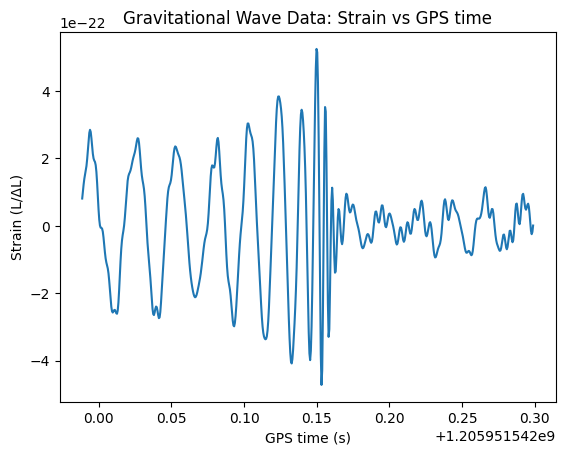

In [4]:
'''Read in the data table for GW event'''

ObsGravWav=pd.read_csv('/content/Observedwaveform.csv')
# print(ObsGravWav.head())


'''plot to inspect current state of data'''

plt.plot(ObsGravWav['time (s)'],ObsGravWav['strain'])
plt.xlabel('GPS time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs GPS time')


Your data will need to be shifted so that the merger occurs at time = 0 secs.

Text(0.5, 1.0, 'Gravitational Wave Data: Strain vs Merger time')

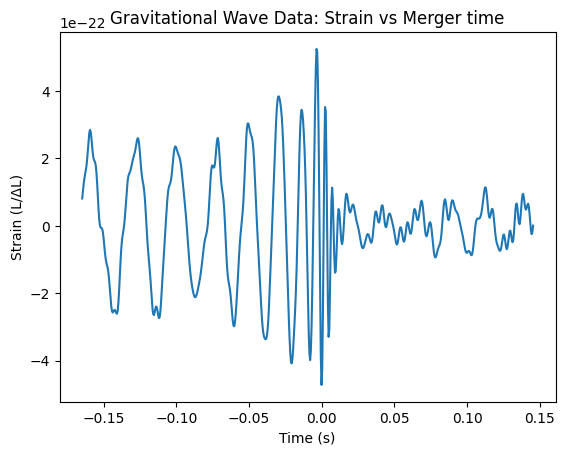

In [5]:
'''Make variable for merger time and take this away from merge data to have merge at t=0, make new field in data for this time'''
GPSMergeTime = 1205951542.153363

ObsGravWav['mergeTime'] = ObsGravWav['time (s)'] - GPSMergeTime

# print(ObsGravWav['mergeTime'])
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs Merger time')

We need to estimate the average noise and its standard deviation in our data.

We start by trying to isolate the merge free data after the event, i.e time >0. If there is no active merger then there should only be noise found in the data.

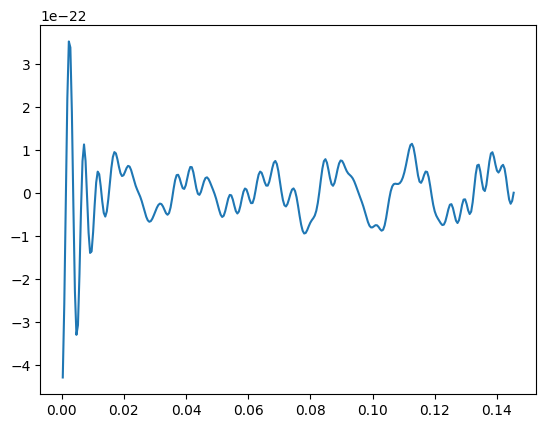

In [10]:
'''To estimate noise, truncate data to only have t>0
Merger is now finsihed we should only have noise in data'''
#chat gpt help to select the entires corrosponding to t>0

positive_time_values = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0, ['mergeTime', 'strain']]

# print(positive_time_values)

plt.plot(positive_time_values['mergeTime'],positive_time_values['strain'])


This approach of taking the data with merge time >0 visually leaves some of the merger event ring down in the data. "Smooth" periodic decaying sine wave before t=0.015

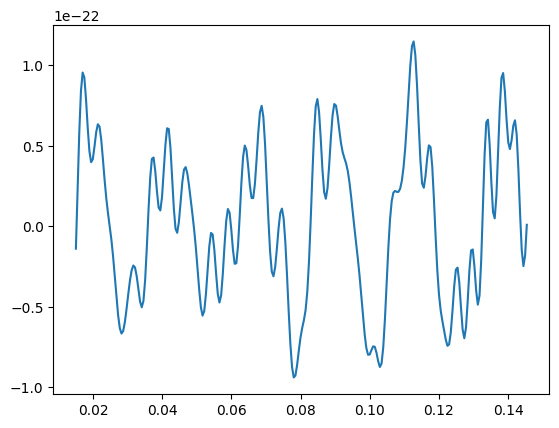

In [13]:
positive_time_values_2 = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0.015, ['mergeTime', 'strain']]

plt.plot(positive_time_values_2['mergeTime'],positive_time_values_2['strain'])

This data look much more uniformly 'noisy' without an obvious behaviour.
With data validity verified we can take the mean and standard deviation.

In [16]:
noiseMean = positive_time_values_2['strain'].mean()
noiseStd = positive_time_values_2['strain'].std()

print(noiseMean,noiseStd)

3.696257988868834e-24 4.857618393929135e-23


***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

**Answer:**

Your answer here

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

**Answer**

Your answer here

***

## Part E - Estimating the total mass using MCMC [75 marks]

**Answer:**

Your answer here

***

## Part F - Putting it all together [36 marks]

**Answer:**

Your answer here

***

## Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>